In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


Task 2.1


In [80]:
data = np.load('Iris_data.npy')
labels = np.load('Iris_labels.npy')

print(f'Shape of Data : {data.shape}')
print(f'Shape of Labels : {labels.shape}')


Shape of Data : (150, 4)
Shape of Labels : (150,)


Number of Features : 4

* Sepal Length
* Sepal Width
* Patal Length
* Patal Width

Number of Samples : 150

Number of Flowers/ Categories : 3

[]

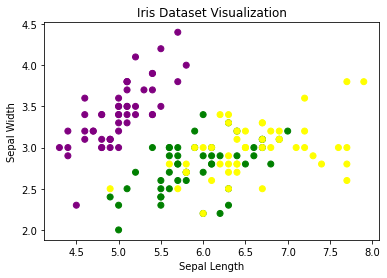

In [82]:
plt.figure()

plt.title('Iris Dataset Visualization')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['purple', 'green', 'yellow'])
legends = np.array(['purple', 'green', 'yellow'])

plt.scatter(data[:, 0], data[:, 1], c = colors[labels])

# TODO : Need to add legends


plt.plot()



Task 2.2

K - Means Clustering


Cluster centers :
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Predicted Lables :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Original Labels :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



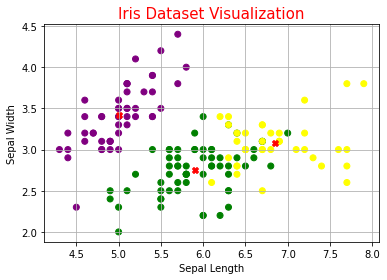

In [97]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 5, random_state = 0).fit(data)
# init : initial centroid selection method, n_init : number of initial centroid selection

print(f'Cluster centers :\n{kmeans.cluster_centers_}\n')
print(f'Predicted Lables :\n{kmeans.labels_}\n')
print(f'Original Labels :\n{labels}\n')

# Visualize in 2D plane
plt.figure()
plt.title(label = 'Iris Dataset Visualization', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

colors = np.array(['green', 'purple', 'yellow'])
plt.scatter(data[:, 0], data[:, 1], c = colors[kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker = 'X')
plt.show()


Task 2.4 
GMM Clustering

GMM Means :
[[5.91697517 2.77803998 4.20523542 1.29841561]
 [5.006      3.418      1.464      0.244     ]
 [6.54632887 2.94943079 5.4834877  1.98716063]]

Predictions :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Original Labels :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



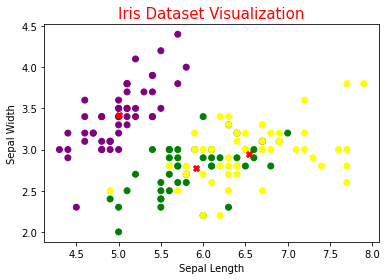

In [102]:
gm = GaussianMixture(n_components=3, max_iter = 50, n_init = 10, random_state=0).fit(data)
print(f'GMM Means :\n{gm.means_}\n')

y = gm.predict(data)
print(f'Predictions :\n{y}\n')
print(f'Original Labels :\n{labels}\n')

# Visualize in 2D plane
plt.figure()
plt.title(label = 'Iris Dataset Visualization', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['green', 'purple', 'yellow'])
plt.scatter(data[:, 0], data[:, 1], c = colors[y])
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], color='red', marker = 'X')
plt.plot()
plt.show()






GMM components shape :
(150, 3)

Gaussian Component Range(P(x|J) where J = 1, 2, 3) :
Min : 7.323192069581473e-272
Max : 1.0



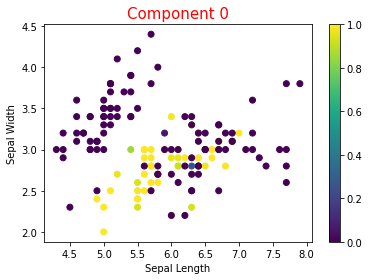

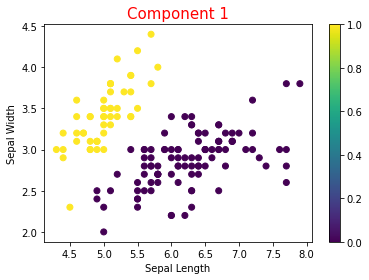

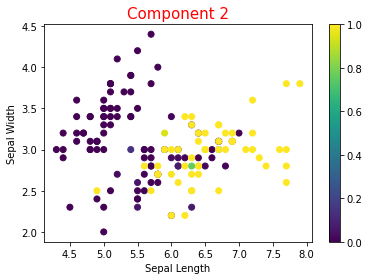

In [119]:
gm_components = gm.predict_proba(data)
print(f'GMM components shape :\n{gm_components.shape}\n')

min = np.amin(gm_components)
max = np.amax(gm_components)
print(f'Gaussian Component Range(P(x|J) where J = 1, 2, 3) :\nMin : {min}\nMax : {max}\n')


plt.figure()
plt.title(label = 'Component 0', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 0], norm = norm, cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

plt.figure()
plt.title(label = 'Component 1', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 1], cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

plt.figure()
plt.title(label = 'Component 2', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 2], cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

Task 2.4


Data Shape :  (100, 10)


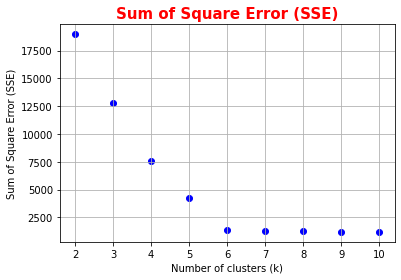

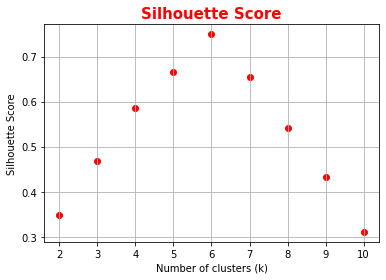

In [79]:
data = np.load('task2_4.npy')
print('Data Shape : ',data.shape)


sse_array = np.zeros(shape = (10,1))
for k in range(2, 11) :
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0).fit(data)

  sse = 0
  for index in range(0, data.shape[0]) :
    point = data[index]
    center = kmeans.cluster_centers_[kmeans.labels_[index]]
    dif = point - center
    sse += np.dot(dif, np.transpose(dif))
  sse_array[k-1] = sse

silhouette_array = np.zeros(shape = (10,1))
for k in range(2, 11) :
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0).fit(data)
  score = silhouette_score(data, kmeans.labels_)
  silhouette_array[k-1] = score

plt.figure()
plt.scatter( np.array(range(2, 11)), sse_array[1: 10], c = 'blue')
plt.title(label = 'Sum of Square Error (SSE)', color = 'r', fontsize = 15, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Error (SSE)')
plt.grid()
plt.show()


plt.figure()
plt.scatter( np.array(range(2, 11)), silhouette_array[1: 10], c = 'red')
plt.title(label = 'Silhouette Score', color = 'r', fontsize = 15, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()
